In [34]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


%matplotlib inline

In [2]:
PATH = 'D:/GitHub/Study/MADE_2022_1_Bin_Classification/MADE_2022_1_Bin_Classification/data/'

In [3]:
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')
sam_sub = pd.read_csv(PATH + 'sample_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6963 non-null   float64
 1   1       6963 non-null   float64
 2   2       6963 non-null   float64
 3   3       6963 non-null   float64
 4   4       6963 non-null   float64
 5   5       6963 non-null   float64
 6   6       6963 non-null   float64
 7   7       6963 non-null   float64
 8   8       6963 non-null   float64
 9   9       6963 non-null   float64
 10  10      6963 non-null   float64
 11  11      6963 non-null   float64
 12  12      6963 non-null   float64
 13  13      6963 non-null   float64
 14  14      6963 non-null   float64
 15  15      6963 non-null   float64
 16  16      6963 non-null   float64
 17  17      6963 non-null   float64
 18  18      6963 non-null   float64
 19  19      6963 non-null   float64
 20  20      6963 non-null   float64
 21  21      6963 non-null   float64
 22  

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3920 non-null   float64
 1   1       3920 non-null   float64
 2   2       3920 non-null   float64
 3   3       3920 non-null   float64
 4   4       3920 non-null   float64
 5   5       3920 non-null   float64
 6   6       3920 non-null   float64
 7   7       3920 non-null   float64
 8   8       3920 non-null   float64
 9   9       3920 non-null   float64
 10  10      3920 non-null   float64
 11  11      3920 non-null   float64
 12  12      3920 non-null   float64
 13  13      3920 non-null   float64
 14  14      3920 non-null   float64
 15  15      3920 non-null   float64
 16  16      3920 non-null   float64
 17  17      3920 non-null   float64
 18  18      3920 non-null   float64
 19  19      3920 non-null   float64
 20  20      3920 non-null   float64
 21  21      3920 non-null   float64
 22  

In [6]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
train['sample'] = 1 # помечаем где у нас трейн
test['sample'] = 0 # помечаем где у нас тест

df = test.append(train, sort=False).reset_index(drop=True) # объединяем

C:\Users\Rusla\AppData\Local\Temp\ipykernel_16504\1945411949.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = test.append(train, sort=False).reset_index(drop=True) # объединяем


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10883 non-null  float64
 1   1       10883 non-null  float64
 2   2       10883 non-null  float64
 3   3       10883 non-null  float64
 4   4       10883 non-null  float64
 5   5       10883 non-null  float64
 6   6       10883 non-null  float64
 7   7       10883 non-null  float64
 8   8       10883 non-null  float64
 9   9       10883 non-null  float64
 10  10      10883 non-null  float64
 11  11      10883 non-null  float64
 12  12      10883 non-null  float64
 13  13      10883 non-null  float64
 14  14      10883 non-null  float64
 15  15      10883 non-null  float64
 16  16      10883 non-null  float64
 17  17      10883 non-null  float64
 18  18      10883 non-null  float64
 19  19      10883 non-null  float64
 20  20      10883 non-null  float64
 21  21      10883 non-null  float64
 22

In [8]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,sample,target
72,2.669639,-6.215175,-1.147396,2.022711,-7.021663,1.082979,3.958009,1.475826,3.479136,6.039867,...,0.324433,-14.081719,-0.24877,-3.082928,-5.761879,1.584222,-1.64743,2.82186,0,NaN


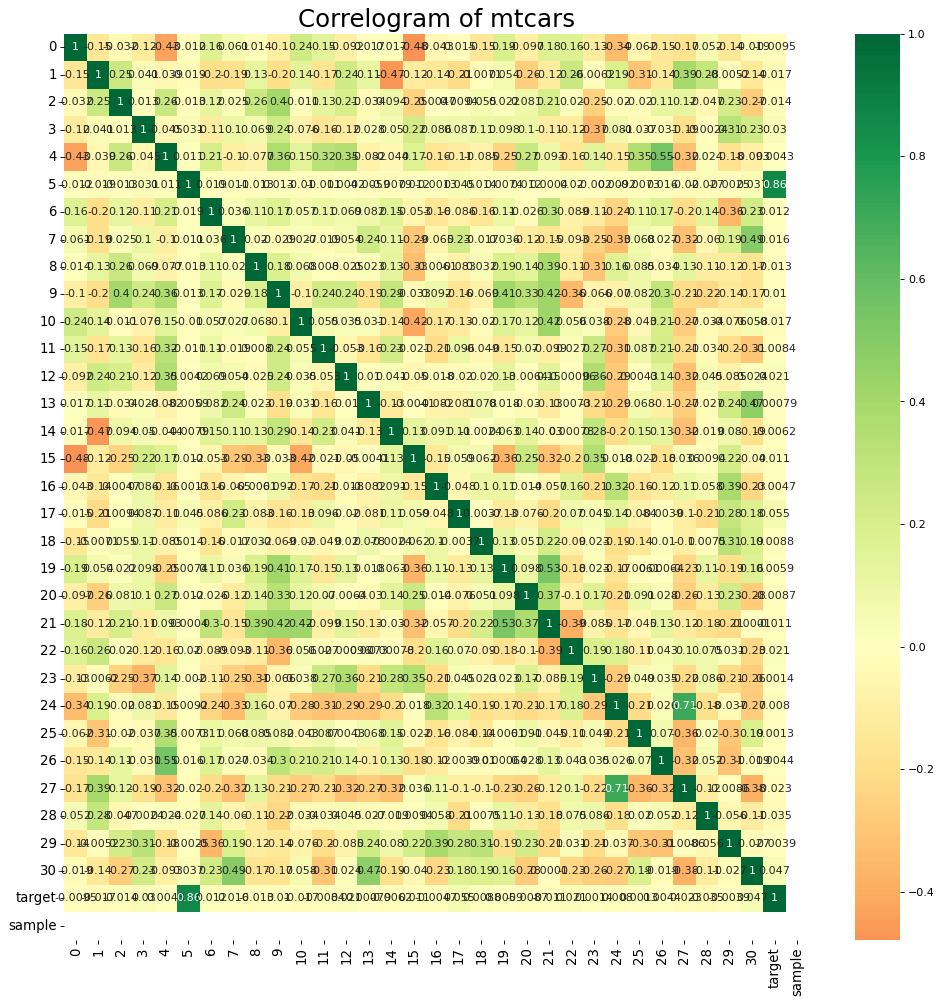

In [9]:
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

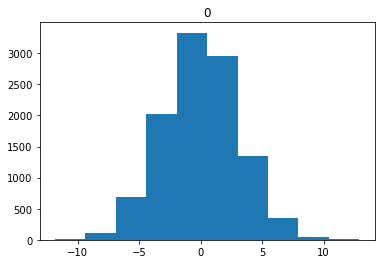

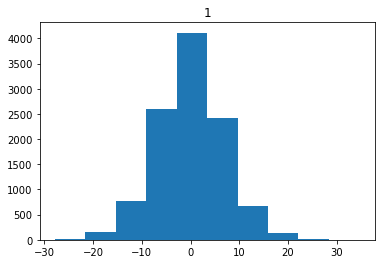

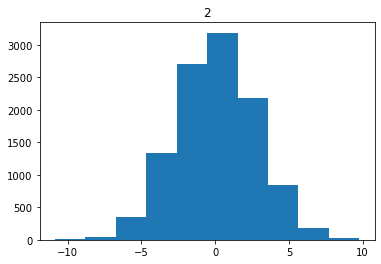

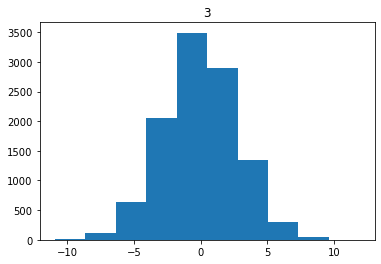

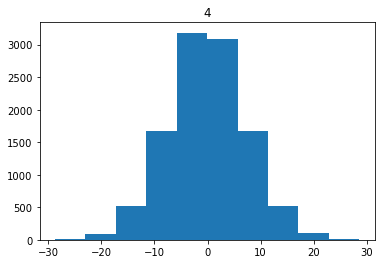

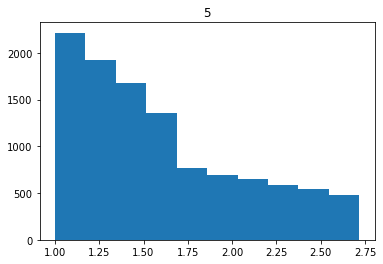

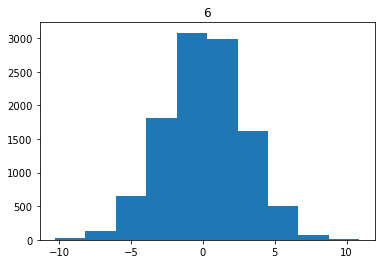

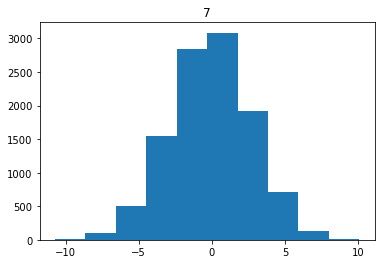

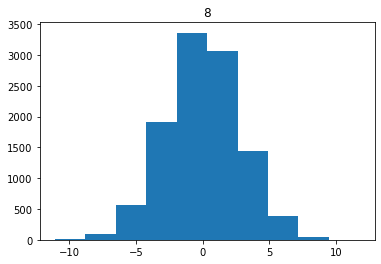

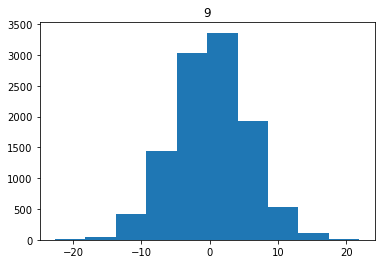

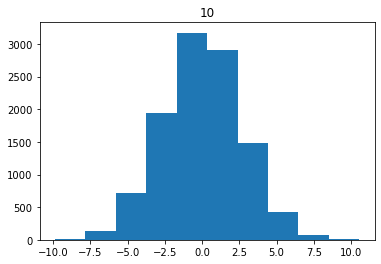

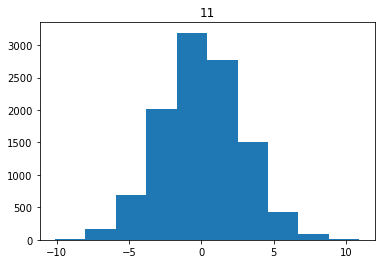

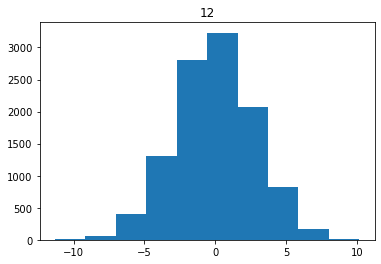

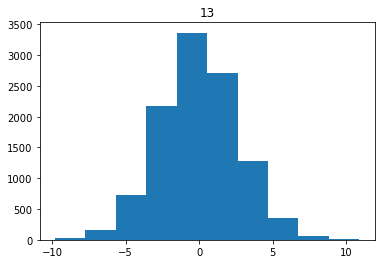

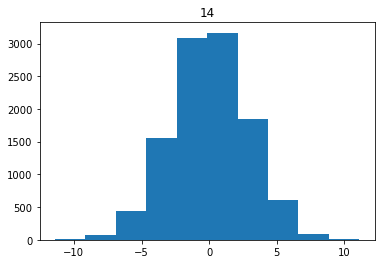

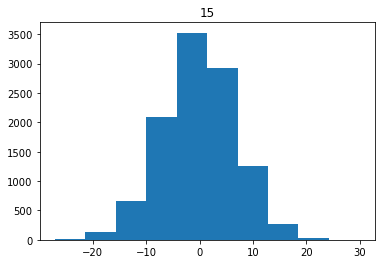

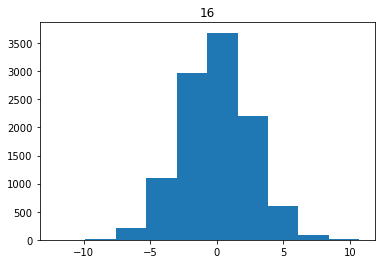

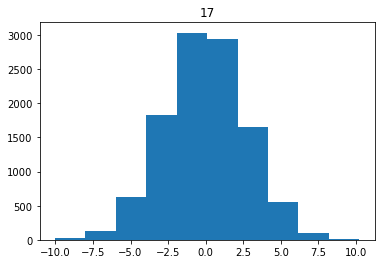

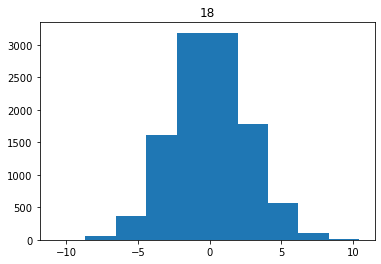

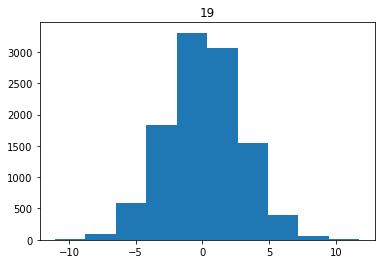

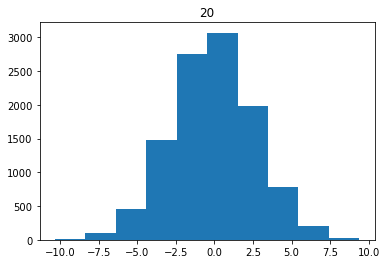

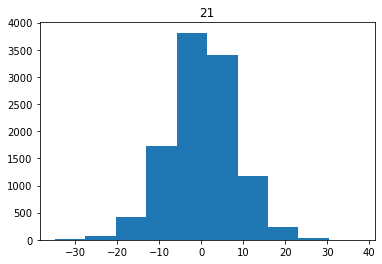

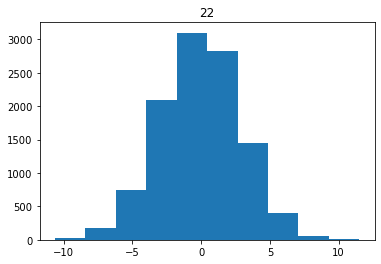

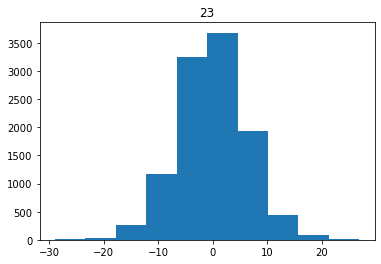

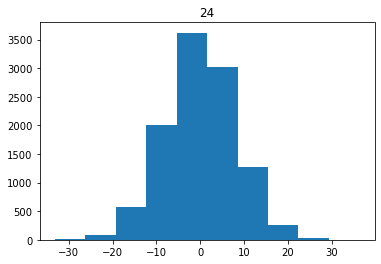

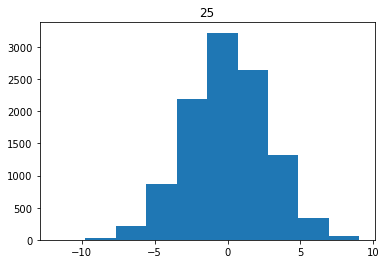

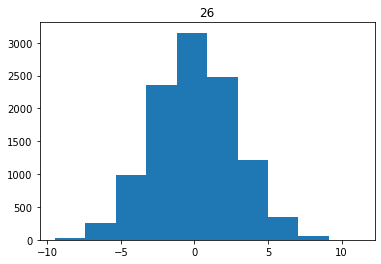

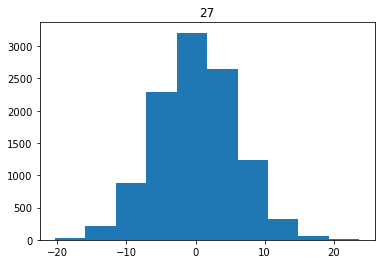

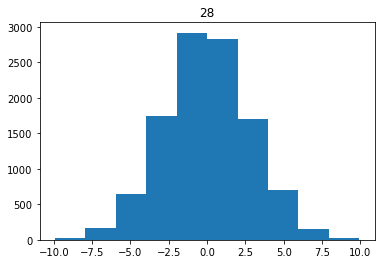

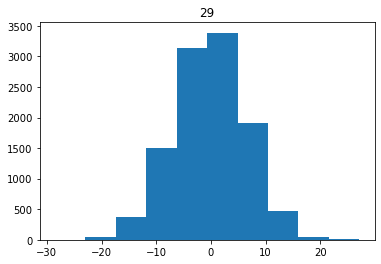

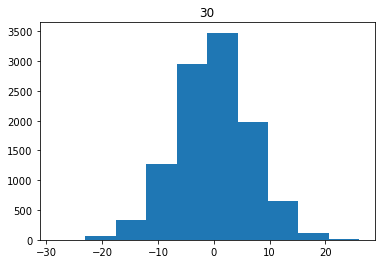

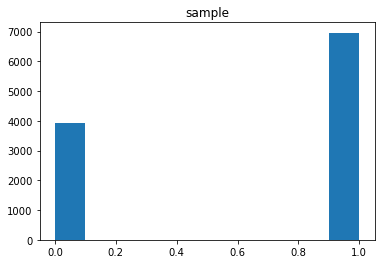

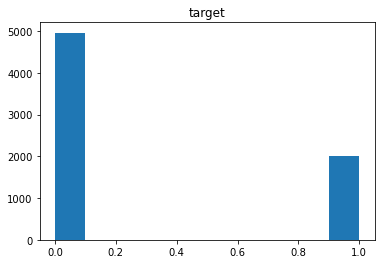

In [10]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [11]:
train = df[df['sample'] == 1].copy()
train.drop(['sample', '5'], axis = 1, inplace = True)

In [12]:
test = df[df['sample'] == 0].copy()
test.drop(['sample','target', '5'], axis = 1, inplace = True)

In [13]:
X = train.drop(['target'], axis = 1).copy()
Y = train['target']

In [14]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.4)

In [15]:
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val,
                                                    stratify=y_test_val, 
                                                    test_size=0.5)

In [16]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.8952879581151832

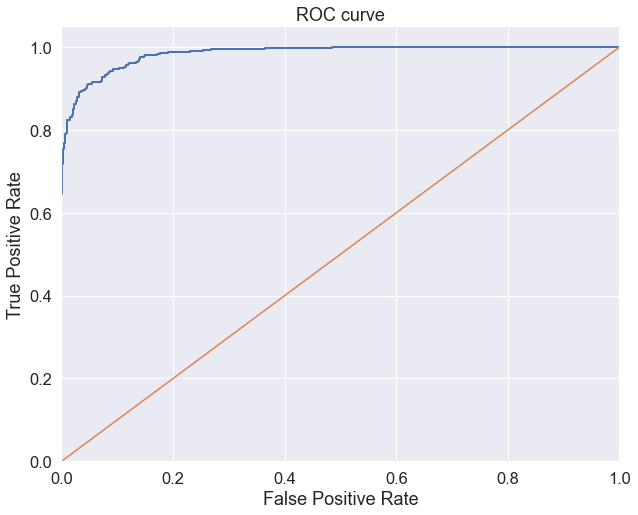

In [17]:
from sklearn import metrics

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [19]:
proc_name = (StandardScaler(), Normalizer(), MinMaxScaler())

In [20]:
for i in proc_name:
    model_2 = make_pipeline(i,clf)
    model_2.fit(X_val, y_val)
    y_pred = model_2.predict(X_test)
    print(i, '= ', f1_score(y_test, y_pred))

StandardScaler() =  0.9058064516129032
Normalizer() =  0.8932291666666666
MinMaxScaler() =  0.9058064516129032


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [23]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_val_score(clf, X_val, y_val, scoring='f1', cv=cv, n_jobs=-1)

array([0.92682927, 0.83116883, 0.83333333, 0.87179487, 0.86842105,
       0.94871795, 0.82857143, 0.92105263, 0.875     , 0.84210526,
       0.85365854, 0.86486486, 0.88311688, 0.88607595, 0.90666667,
       0.77777778, 0.8974359 , 0.8974359 , 0.83116883, 0.89473684,
       0.86111111, 0.88607595, 0.88607595, 0.925     , 0.86075949,
       0.84210526, 0.89189189, 0.9       , 0.86842105, 0.85333333])

In [24]:
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [25]:
y_pred_val = clf.predict(X_val)
f1_score(y_val, y_pred_val)

0.8952134540750323

In [35]:
clf_2 = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler(),clf)
clf_2.fit(X_train, y_train)
y_pred_2 = clf_2.predict(X_test)
f1_score(y_test, y_pred_2)

0.8952879581151832

In [36]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_val_score(clf_2, X_val, y_val, scoring='f1', cv=cv, n_jobs=-1)

array([0.92682927, 0.83116883, 0.83333333, 0.87179487, 0.86842105,
       0.94871795, 0.82857143, 0.92105263, 0.875     , 0.84210526,
       0.85365854, 0.86486486, 0.88311688, 0.88607595, 0.90666667,
       0.77777778, 0.8974359 , 0.8974359 , 0.83116883, 0.89473684,
       0.86111111, 0.88607595, 0.88607595, 0.925     , 0.86075949,
       0.84210526, 0.89189189, 0.9       , 0.86842105, 0.85333333])

In [44]:
clf_2.fit(X_train, y_train)
y_pred_2 = clf_2.predict(X_test)
f1_score(y_test, y_pred_2)

0.8952879581151832

,0.35,0.40,0.45,0.55,0.60,0.65,0.70,0.75,0.80,0.85
0,0.898,0.8995,0.8985,0.893,0.8901,0.8817,0.8719,0.8658,0.8543,0.8355


0.4 0.8995


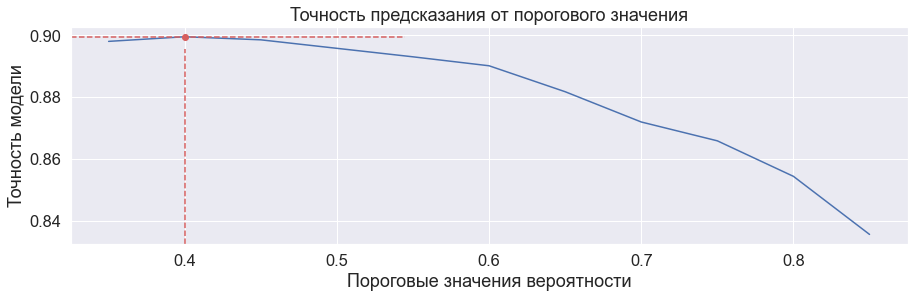

In [46]:
perc_test = [0.35, 0.4, 0.45, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]

acc, perc = list(), list()
dict_acc = {}
for i in perc_test:
    y_pred_perc = clf_2.predict_proba(X_val)
    y_pred_perc = pd.Series([x[1] for x in y_pred_perc])
    y_pred = y_pred_perc.apply(lambda x: True if x > i else False)
    scores = round(f1_score(y_val, y_pred), 4)
    acc.append(scores)
    perc.append(i)
    dict_acc[i] = scores
    #print(i, scores)

display(pd.DataFrame(acc, perc).T)
a = pd.Series(dict_acc).idxmax()
a1 = max(dict_acc.values())
print(a, a1)
plt.figure(figsize=(15,4))
plt.plot(perc, acc)
plt.plot(a, a1,'ro')
plt.axhline(y=a1, xmin=0, xmax=a, color='r', ls='--')
plt.axvline(x=a, ymin=0, ymax=a1, color='r', ls='--')
plt.title('Точность предсказания от порогового значения')
plt.xlabel('Пороговые значения вероятности')
plt.ylabel('Точность модели')
plt.show()

,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45
0,0.898,0.898,0.9002,0.8972,0.8984,0.8995,0.8992,0.899,0.8987,0.8973,0.8985


0.37 0.9002


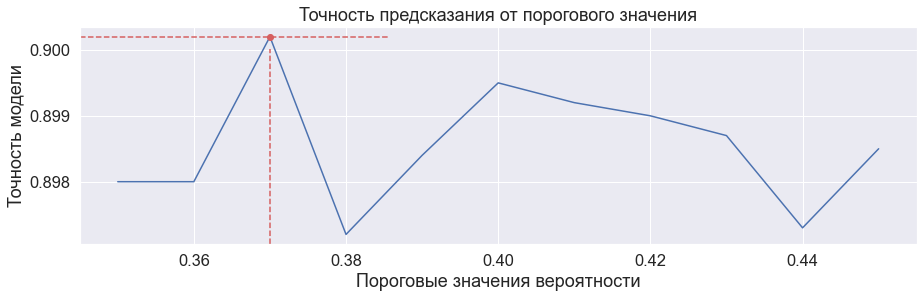

In [51]:
perc_test = np.round(np.arange(0.35, 0.45, 0.01),2)

acc, perc = list(), list()
dict_acc = {}
for i in perc_test:
    y_pred_perc = clf_2.predict_proba(X_val)
    y_pred_perc = pd.Series([x[1] for x in y_pred_perc])
    y_pred = y_pred_perc.apply(lambda x: True if x > i else False)
    scores = round(f1_score(y_val, y_pred), 4)
    acc.append(scores)
    perc.append(i)
    dict_acc[i] = scores
    #print(i, scores)

display(pd.DataFrame(acc, perc).T)
a = pd.Series(dict_acc).idxmax()
a1 = max(dict_acc.values())
print(a, a1)
plt.figure(figsize=(15,4))
plt.plot(perc, acc)
plt.plot(a, a1,'ro')
plt.axhline(y=a1, xmin=0, xmax=a, color='r', ls='--')
plt.axvline(x=a, ymin=0, ymax=a1, color='r', ls='--')
plt.title('Точность предсказания от порогового значения')
plt.xlabel('Пороговые значения вероятности')
plt.ylabel('Точность модели')
plt.show()

In [47]:
test = df[df['sample'] == 0].copy()
test.drop(['sample','target', '5'], axis = 1, inplace = True)

In [48]:
tar = clf_2.predict_proba(test)

In [52]:
tar

array([[1.00000000e+00, 1.99446850e-10],
       [9.99642654e-01, 3.57345910e-04],
       [9.68646673e-01, 3.13533274e-02],
       ...,
       [9.98118703e-01, 1.88129713e-03],
       [9.65180498e-01, 3.48195019e-02],
       [9.89117507e-01, 1.08824931e-02]])

In [58]:
test['sub'] = [x[1] for x in tar]

In [59]:
test.sample()

,0,1,2,3,4,6,7,8,9,10,...,23,24,25,26,27,28,29,30,target,sub
668,-4.440194,16.399334,-4.088944,-0.045983,0.497993,-3.901292,-0.746185,0.112303,-14.160747,4.761675,...,7.128219,0.182651,-3.417651,-1.048778,-2.794573,3.437383,7.379473,7.217905,1.140370e-16,1.140370e-16


In [64]:
test['target'] = test['sub'].apply(lambda x: 1 if x > 0.4 else 0)

In [65]:
submission = test[['target']]

In [66]:
display(submission.sample(10))
display(submission.shape)

,target
3147,0
3474,0
3776,0
2549,0
423,0
222,0
3697,0
2786,1
3168,0
3837,0


(3920, 1)

In [67]:
submission.to_csv('submission_prd_prod_40.csv', index=False)